In [2]:
#import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors as colors
from matplotlib import rc
plt.rcParams["font.serif"]       = 'Times New Roman'
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["xtick.labelsize"]  = 25
plt.rcParams["ytick.labelsize"]  = 25

plt.rcParams["legend.title_fontsize"]=25
import sys

In [58]:
nGPUs = np.array([8, 64, 512, 1024, 2048, 4096])
tpts_1200 = np.array([0.1815, 0.1783, 0.1803, 0.1806, 0.2145, 0.3307])
fillbcfinish_1200 = np.array([16.15, 16.55, 18.49, 18.73, 30.62, 51.62])
fillbcnowait_1200 = np.array([9.50, 8.69, 8.73, 8.68, 8.48, 22.56])

macroevolveE_1200 = np.array([36.97, 37.45,37.11,36.85,31.43,34.52])
evolveB_1200 = np.array([12.91,13.07,12.86,12.84,10.89,11.70])

comm_time_1200 = (fillbcfinish_1200 + fillbcnowait_1200)
comp_time_1200 = (macroevolveE_1200 + evolveB_1200)
#nGPUs = np.array([8, 64, 512, 1024, 2048])
#tpts_1200 = np.array([0.1815, 0.1783, 0.1803, 0.1806, 0.2145])
wse_1200 = tpts_1200[0]/tpts_1200

In [59]:
print(comm_time_1200 + comp_time_1200)

[ 75.53  75.76  77.19  77.1   81.42 120.4 ]


/tmp/ipykernel_318465/1635573341.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,4096)


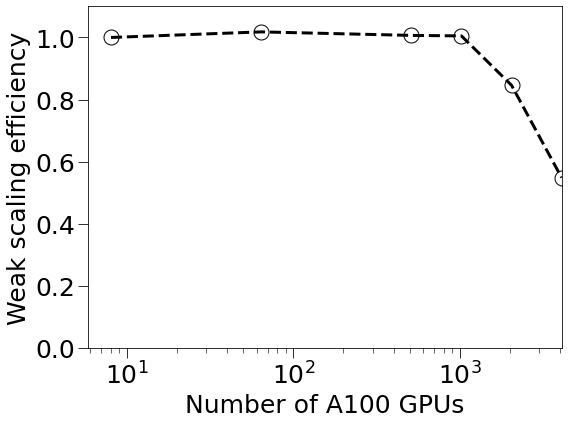

In [60]:

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.patch.set_facecolor('white')

#ax1.legend(prop={'size': 30},loc='lower right')

ax.plot(nGPUs, wse_1200,'k--', linewidth=3,marker='o',markersize=15,fillstyle='none')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(0,4096)
ax.set_ylim(0,1.1)

ax.set_ylabel(r'Weak scaling efficiency', fontsize=25)
ax.set_xlabel(r'Number of A100 GPUs', fontsize=25)

fig.tight_layout()
plt.savefig('weak_scaling_ARTEMIS_xlog.png', bbox_inches = "tight")#

/tmp/ipykernel_318465/1910396225.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,5000)


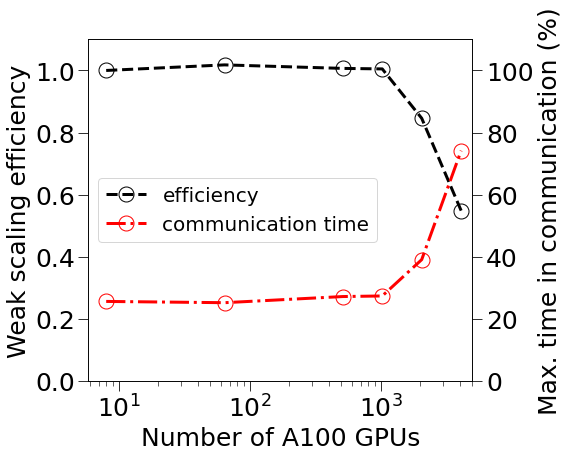

In [71]:

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.patch.set_facecolor('white')


p1 = ax.plot(nGPUs, wse_1200,'k--', linewidth=3,marker='o',markersize=15,fillstyle='none',label='efficiency')
ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_xlim(0,5000)
ax.set_ylim(0,1.1)
ax2 = ax.twinx() 
ax2.set_ylim(0,110)
p2=ax2.plot(nGPUs, comm_time_1200,'r-.', linewidth=3,marker='o',markersize=15,fillstyle='none',label='communication time')

ax.set_ylabel(r'Weak scaling efficiency', fontsize=25)
ax.set_xlabel(r'Number of A100 GPUs', fontsize=25)
ax2.set_ylabel(r'Max. time in communication (%)', fontsize=25)

lns = p1+p2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='center left',prop={'size': 20})


fig.tight_layout()
plt.savefig('weakScaling_commTime_ARTEMIS_xlog.png', bbox_inches = "tight")#

/tmp/ipykernel_318465/3798058615.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0,4096)


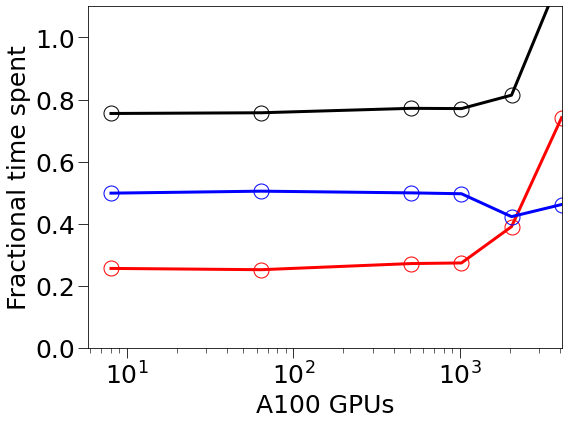

In [51]:
# fig, ax = plt.subplots(1,1)
# fig.set_size_inches(8,6)
# fig.patch.set_facecolor('white')

# #ax1.legend(prop={'size': 30},loc='lower right')

# p1, = ax.plot(nGPUs, comm_time_1200,'r', linewidth=3,marker='o',markersize=15,fillstyle='none', label='communication')
# p2, = ax.plot(nGPUs, comp_time_1200,'b', linewidth=3,marker='o',markersize=15,fillstyle='none', label='computation')

# ax.set_xscale('log')
# #ax.set_yscale('log')

# ax.set_xlim(0,4096)
# ax.set_ylim(0,1.1)

# ax.set_ylabel(r'Fractional time spent', fontsize=25)
# ax.set_xlabel(r'A100 GPUs', fontsize=25)

# fig.tight_layout()
# plt.savefig('compute_comm_time_ARTEMIS.png', bbox_inches = "tight")#